In [3]:
pip install jupyter pandas numpy scikit-learn tensorflow matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow.keras import layers, models # type: ignore


In [7]:
df = pd.read_csv("D:\Projects\Rent Prediction\Model Training\Dataset\House_Rent_Dataset.csv")  
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [8]:
df.drop(['Posted On'], axis=1, inplace=True)

y = df['Rent']
X = df.drop('Rent', axis=1)

print(X.isnull().sum())

df.head()


BHK                  0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [9]:
numerical = ['Size', 'BHK', 'Bathroom']
categorical = ['Area Type', 'Area Locality','City', 'Furnishing Status', 'Tenant Preferred']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

input_shape = X_train_processed.shape[1]

In [10]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_shape,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

c:\Users\hussa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       247,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,257 (1001.00 KB)

 Trainable params: 256,257 (1001.00 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train_processed, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5335192576.0000 - mae: 34836.5820 - val_loss: 3960760832.0000 - val_mae: 32220.6211
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5154147840.0000 - mae: 33651.9141 - val_loss: 3886237440.0000 - val_mae: 31336.4922
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6052150784.0000 - mae: 31996.9746 - val_loss: 3678837504.0000 - val_mae: 28800.0684
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4741636608.0000 - mae: 29957.5137 - val_loss: 3328225792.0000 - val_mae: 24142.9180
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5307841024.0000 - mae: 25572.4531 - val_loss: 2932143872.0000 - val_mae: 19942.1797
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10745829376.0000 - mae: 23660.1738 - val_loss: 2577314560.0000 - val_mae: 19189.1230
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3988794624.0000 - mae: 21632.2266 - val_loss: 2317836032.0000 - val_

In [12]:
loss, mae = model.evaluate(X_test_processed, y_test)
print("Test MAE:", mae)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1360672896.0000 - mae: 17037.7012
Test MAE: 16616.34765625


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


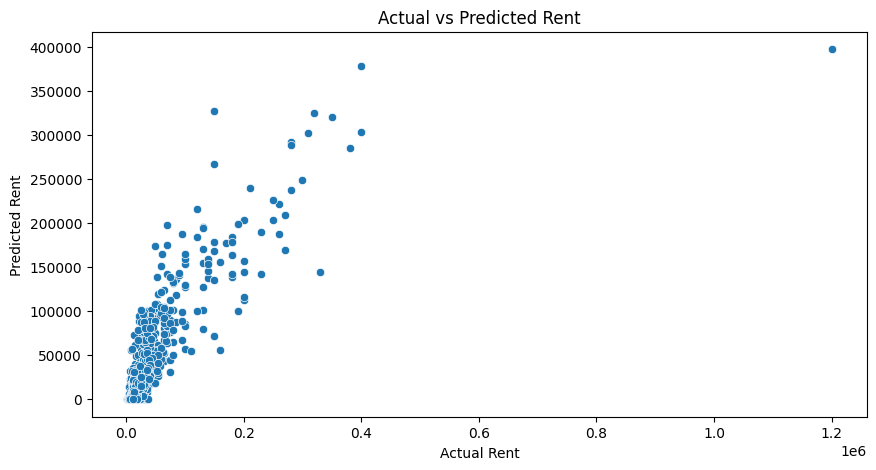

In [13]:
y_pred = model.predict(X_test_processed)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred.flatten())
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs Predicted Rent")
plt.show()


In [14]:
model.save("rent_prediction_model.h5")

In [15]:
import joblib

joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [18]:
unique_values = df['City'].unique()
print(unique_values)

['Kolkata' 'Mumbai' 'Bangalore' 'Delhi' 'Chennai' 'Hyderabad']


In [22]:
city_locality_map = (
    df.groupby('City')['Area Locality']
    .unique()
    .apply(list)
    .to_dict()
)
print(city_locality_map)

{'Bangalore': ['Talagatta Pura', 'Nagappa Reddy layout-Dooravani Nagar', 'Kattigenahalli, Bellary Road', 'C V Raman Nagar', 'Chikkalasandra, Bangalore', 'Talaghattapura', 'Malleshwaram', 'Ramaiah Layout, Kacharakanahalli', 'Rajajinagar', 'Padmanabha Nagar', 'Kengeri Main Road', 'Ramamurthy Nagar', 'Thanisandra', 'J P Nagar', 'Bannerghatta Main Road', 'Vinayakanagar, Hebbal', 'venkatapuram', 'Vv Nagar, Bikasipura', 'Kacharakanahalli', 'Tumkur Road', 'Babusahib Palya', 'Kumaraswamy Layout, Kumaraswamy Layout', 'Nri Layout', 'Balaji Layout -Hongasandra, Hongasandra', 'Vijaya Bank Layout', 'Jaya Nagar Block 1, Jayanagar', 'Maruthi Sevanagar', 'Nelamangala', 'Yelahanka New Town', 'Hongasandra', 'Girinagar', 'T Dasarahalli', 'Jogupalya', 'Balaji Gardens Layout, Gottigere', 'in Bannerghatta Road', 'Electronic City Phase 2, Electronic City', 'Hebbal', 'Jalahalli East', 'Garebhavipalya, Hongasandra, Hosur Road', 'Btm Layout Stage 4', 'Konanakunte', 'Basaveshwar Nagar', 'Jp Nagar Phase 7, J P Na